Notebook where the nn distance is correlated to the auc_std. Should be used for
all analysis meant to know about a model consistency in its embeddings generation.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from contrastive.utils.models_database import import_bdd

In [2]:
bdd = import_bdd()
bdd

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,batch_size,drop_rate,early_stopping_patience,foldlabel,input_size,lr,max_angle,max_epochs,num_outputs,num_representation_features,temperature,temperature_initial,train_loss,val_loss,exclude,0.1_quantile,dataset_name,git_branch
116,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.694205,0.008692,0.669267,0.009264,pointnet,16,0.15,100,True,"(1, 17, 40, 38)",0.0004,6,250,30,30,0.5,0.5,4.367986,4.052493,False,-0.430873,cingulate_HCP_half_1,pointnet
75,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.693590,0.051831,0.619449,0.052646,densenet,16,0.05,100,True,"(1, 17, 40, 38)",0.0004,6,250,30,30,0.1,0.1,0.762840,1.369004,False,0.757828,cingulate_HCP_half_1,Run_03_aymeric
25,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.692153,0.049598,0.629595,0.054254,densenet,16,0.15,100,True,"(1, 17, 40, 38)",0.0004,6,250,30,30,0.1,0.1,1.032371,2.509686,False,0.683913,cingulate_HCP_half_1,Run_03_aymeric
91,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.678702,0.006920,0.668692,0.007873,pointnet,16,0.05,100,True,"(1, 17, 40, 38)",0.0004,6,250,30,30,0.1,0.1,1.336895,2.419318,False,-0.361733,cingulate_HCP_half_1,pointnet
12,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.678640,0.044072,0.634545,0.037935,convnet,16,0.15,100,False,"(1, 17, 40, 38)",0.0004,10,250,30,30,0.1,0.1,0.263586,0.195343,False,-0.301107,cingulate_HCP_half_1,Run_03_aymeric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.482994,0.034076,0.512551,0.030729,densenet,16,0.15,100,False,"(1, 17, 40, 38)",0.0004,10,250,4,4,0.1,0.1,3.753164,3.651408,False,-0.688383,cingulate_HCP_half_1,Run_03_aymeric
100,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.478818,0.022703,0.576880,0.003572,pointnet,16,0.05,100,True,"(1, 17, 40, 38)",0.0004,6,250,4,4,0.5,0.5,5.256860,5.389712,False,0.129245,cingulate_HCP_half_1,pointnet
19,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.473885,0.042166,0.510393,0.050783,convnet,16,0.15,100,False,"(1, 17, 40, 38)",0.0004,10,250,4,4,0.1,0.1,8.022524,6.433455,False,0.943119,cingulate_HCP_half_1,Run_03_aymeric
38,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.466274,0.034258,0.547683,0.020623,densenet,16,0.15,100,False,"(1, 17, 40, 38)",0.0004,10,250,4,4,0.1,0.1,3.534628,3.446562,False,-0.106718,cingulate_HCP_half_1,Run_03_aymeric


In [3]:
nn_measured = bdd[bdd.model_path.str.contains("/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders")]
nn_measured

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,batch_size,drop_rate,early_stopping_patience,foldlabel,input_size,lr,max_angle,max_epochs,num_outputs,num_representation_features,temperature,temperature_initial,train_loss,val_loss,exclude,0.1_quantile,dataset_name,git_branch
25,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.692153,0.049598,0.629595,0.054254,densenet,16,0.15,100,True,"(1, 17, 40, 38)",0.0004,6,250,30,30,0.1,0.1,1.032371,2.509686,False,0.683913,cingulate_HCP_half_1,Run_03_aymeric
12,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.678640,0.044072,0.634545,0.037935,convnet,16,0.15,100,False,"(1, 17, 40, 38)",0.0004,10,250,30,30,0.1,0.1,0.263586,0.195343,False,-0.301107,cingulate_HCP_half_1,Run_03_aymeric
24,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.668507,0.053301,0.601525,0.057313,densenet,16,0.15,100,True,"(1, 17, 40, 38)",0.0004,6,250,30,30,0.1,0.1,0.728199,1.858723,False,0.753235,cingulate_HCP_half_1,Run_03_aymeric
31,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.667760,0.007311,0.637935,0.006157,densenet,16,0.15,100,True,"(1, 17, 40, 38)",0.0004,6,250,4,4,0.1,0.1,4.551565,4.698318,False,0.920890,cingulate_HCP_half_1,Run_03_aymeric
23,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.666927,0.045576,0.607496,0.045533,densenet,16,0.15,100,True,"(1, 17, 40, 38)",0.0004,6,250,30,30,0.1,0.1,1.161694,2.237229,False,0.479738,cingulate_HCP_half_1,Run_03_aymeric
13,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.659859,0.049886,0.622944,0.040240,convnet,16,0.15,100,False,"(1, 17, 40, 38)",0.0004,10,250,30,30,0.1,0.1,0.295758,0.214600,False,-0.419219,cingulate_HCP_half_1,Run_03_aymeric
2,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.659754,0.048348,0.617584,0.042720,convnet,16,0.15,250,True,"(1, 17, 40, 38)",0.0004,6,250,30,30,0.1,0.1,0.416473,0.440377,False,-0.051465,cingulate_HCP_half_1,Run_03_aymeric
6,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.658169,0.039913,0.675953,0.025605,convnet,16,0.15,100,True,"(1, 17, 40, 38)",0.0004,6,250,4,4,0.1,0.1,3.525009,3.058584,False,-0.811622,cingulate_HCP_half_1,Run_03_aymeric
11,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.642758,0.042647,0.608856,0.035870,convnet,16,0.15,100,False,"(1, 17, 40, 38)",0.0004,10,250,30,30,0.1,0.1,0.255924,0.162864,False,-0.339098,cingulate_HCP_half_1,Run_03_aymeric
15,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.638871,0.042499,0.607191,0.034813,convnet,16,0.15,250,False,"(1, 17, 40, 38)",0.0004,10,250,30,30,0.1,0.1,0.233034,0.280861,False,-0.387800,cingulate_HCP_half_1,Run_03_aymeric


In [4]:
nn_dist = pd.read_csv("/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders/#performance_comparisons/nn/nne_ln.csv", index_col=0)
nn_dist

,convnet,densenet2
foldlabel_30,0.433729,0.596620
foldlabel_4,0.783451,0.731105
no_foldlabel_30,0.324525,0.422612
no_foldlabel_4,0.849684,0.750240


In [5]:
parameters = ['backbone_name','foldlabel','num_representation_features']

In [6]:
std_values = nn_measured.groupby(parameters).auc_std.mean()
#print(std_values)


std_df = np.zeros((4,2))
std_df[:,0] = std_values['convnet'][::-1]
std_df[:,1] = std_values['densenet'][::-1]


std_df = pd.DataFrame(std_df, columns=nn_dist.columns, index=nn_dist.index)
std_df

backbone_name  foldlabel  num_representation_features
convnet        False      4                              0.042906
                          30                             0.044261
               True       4                              0.046497
                          30                             0.044489
densenet       False      4                              0.029519
                          30                             0.038345
               True       4                              0.032754
                          30                             0.049897
Name: auc_std, dtype: float64


,convnet,densenet2
foldlabel_30,0.044489,0.049897
foldlabel_4,0.046497,0.032754
no_foldlabel_30,0.044261,0.038345
no_foldlabel_4,0.042906,0.029519


In [8]:
## same thing but with auc
auc_values = nn_measured.groupby(parameters).auc.mean()
#print(auc_values)


auc_df = np.zeros((4,2))
auc_df[:,0] = auc_values['convnet'][::-1]
auc_df[:,1] = auc_values['densenet'][::-1]


auc_df = pd.DataFrame(auc_df, columns=nn_dist.columns, index=nn_dist.index)
auc_df

,convnet,densenet2
foldlabel_30,0.613729,0.658608
foldlabel_4,0.606950,0.583352
no_foldlabel_30,0.649748,0.575910
no_foldlabel_4,0.522667,0.483569


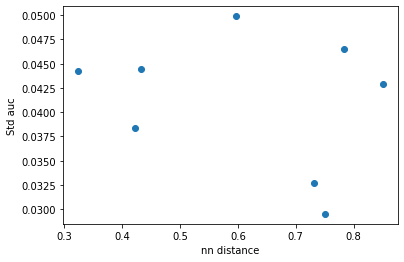

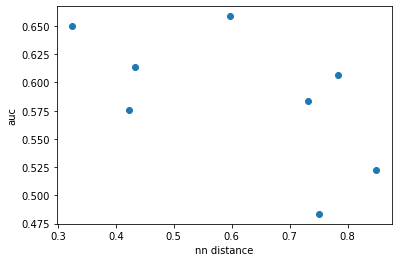

In [9]:
plt.scatter(nn_dist.values.flatten(), std_df.values.flatten())
plt.xlabel("nn distance")
plt.ylabel("Std auc")
plt.show()

plt.scatter(nn_dist.values.flatten(), auc_df.values.flatten())
plt.xlabel("nn distance")
plt.ylabel("auc")
plt.show()

## Pointnet

In [10]:
pointnets = bdd[bdd.backbone_name == 'pointnet']
repeat_pointnets = pointnets[pointnets.model_path.str.contains('file')]
repeat_pointnets

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,batch_size,drop_rate,early_stopping_patience,foldlabel,input_size,lr,max_angle,max_epochs,num_outputs,num_representation_features,temperature,temperature_initial,train_loss,val_loss,exclude,0.1_quantile,dataset_name,git_branch
91,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.678702,0.006920,0.668692,0.007873,pointnet,16,0.05,100,True,"(1, 17, 40, 38)",0.0004,6,250,30,30,0.1,0.1,1.336895,2.419318,False,-0.361733,cingulate_HCP_half_1,pointnet
105,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.672935,0.013104,0.594358,0.004636,pointnet,16,0.05,100,True,"(1, 17, 40, 38)",0.0004,6,250,4,4,0.5,0.5,4.635521,4.643420,False,-0.759075,cingulate_HCP_full,pointnet
87,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.670079,0.008259,0.642768,0.008339,pointnet,16,0.05,100,True,"(1, 17, 40, 38)",0.0004,6,250,30,30,0.1,0.1,1.190189,1.512488,False,-0.371983,cingulate_HCP_half_1,pointnet
90,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.669777,0.006462,0.680352,0.007750,pointnet,16,0.05,100,True,"(1, 17, 40, 38)",0.0004,6,250,30,30,0.1,0.1,1.477166,1.418302,False,-0.406280,cingulate_HCP_half_1,pointnet
88,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.667489,0.007258,0.639660,0.004682,pointnet,16,0.05,100,True,"(1, 17, 40, 38)",0.0004,6,250,30,30,0.1,0.1,1.381919,1.973476,False,-0.309414,cingulate_HCP_half_1,pointnet
92,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.666463,0.007006,0.656751,0.007846,pointnet,16,0.05,100,True,"(1, 17, 40, 38)",0.0004,6,250,30,30,0.1,0.1,1.495126,1.853137,False,-0.387713,cingulate_HCP_half_1,pointnet
98,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.661953,0.003243,0.658041,0.003178,pointnet,16,0.05,100,True,"(1, 17, 40, 38)",0.0004,6,250,4,4,0.5,0.5,4.674354,4.030462,False,-0.722002,cingulate_HCP_half_1,pointnet
95,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.661557,0.011752,0.650041,0.011841,pointnet,16,0.05,100,True,"(1, 17, 40, 38)",0.0004,6,250,30,30,0.1,0.1,1.257227,1.789311,False,-0.433067,cingulate_HCP_full,pointnet
104,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.659615,0.005971,0.631543,0.005587,pointnet,16,0.05,100,True,"(1, 17, 40, 38)",0.0004,6,250,4,4,0.5,0.5,4.577002,4.646541,False,-0.736746,cingulate_HCP_full,pointnet
112,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.659243,0.006187,0.631214,0.009741,pointnet,16,0.05,100,False,"(1, 17, 40, 38)",0.0004,10,250,30,30,0.1,0.1,1.053026,1.015665,False,-0.474192,cingulate_HCP_half_1,pointnet


In [27]:
main_path = "/neurospin/dico/agaudin/Runs/04_pointnet/Output/pointnet"
folders = [folder for folder in os.listdir(main_path)
           if 'file' in folder]

nn_means = []
auc_stds = []

for folder in folders:
    auc_stds.append(pointnets[pointnets.model_path.str.contains(main_path+'/'+folder)].auc_std.mean())
    with open(main_path+'/'+folder+'/#nn/mean_nn.txt', 'r') as file:
        nne = file.readline()
        nn_means.append(float(nne))

In [29]:
for i in range(len(folders)):
    print(folders[i], nn_means[i])

file_fold_4_drop_rate=0.05_HCPfull 0.5946846447888086
file_fold_30_drop_rate=0.05_HCPfull 0.43847828037491465
file_fold_4_drop_rate=0.05 0.6933971041647385
file_no_30_drop_rate=0.05 0.44561359329634254
file_no_30 0.6433180418532796
file_fold_30_drop_rate=0.05 0.4395491986444514


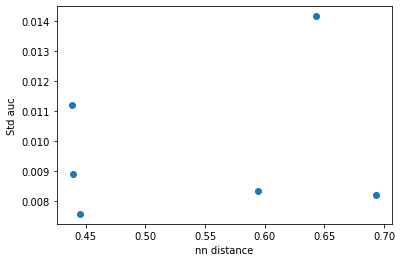

In [16]:
plt.scatter(nn_means, auc_stds)
plt.xlabel("nn distance")
plt.ylabel("Std auc")
plt.show()

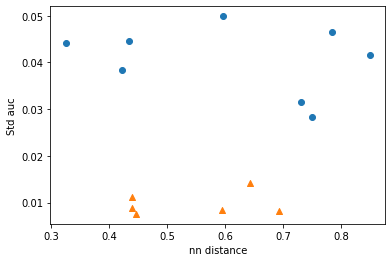

In [25]:
# porque no los dos?

plt.scatter(nn_dist.values.flatten(), std_df.values.flatten())
plt.scatter(nn_means, auc_stds, marker='^')
plt.xlabel("nn distance")
plt.ylabel("Std auc")
plt.show()